# Natural Language Processing

In [1]:
%%capture
pip install seaborn

In [2]:
%%capture
pip install textblob nltk

In [3]:
from collections import Counter
import csv
import matplotlib.pyplot as plt
from nltk import Text
from nltk.draw.dispersion import dispersion_plot
from nltk.tokenize import word_tokenize
import numpy as np
import os
import pandas as pd
import seaborn as sns
from textblob import TextBlob

In [4]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Viewing data from TMDB_scraped_actors

In [5]:
# Loacte the data files in folder
TMDB_SCRAPED_FEATURES_PATH = os.path.join(os.path.abspath(""), "data", "TMDB_scraped_features.csv")
TMDB_SCRAPED_ACTORS_PATH = os.path.join(os.path.abspath(""), "data", "TMDB_scraped_actors.csv")
TMDB_SCRAPED_GENRES_PATH = os.path.join(os.path.abspath(""), "data", "TMDB_genres.csv")
WIKI_SCRAPED_PAGES_PATH = os.path.join(os.path.abspath(""), "data", "WIKI_scraped_pages.csv")

# Print paths
print(TMDB_SCRAPED_FEATURES_PATH)
print(TMDB_SCRAPED_ACTORS_PATH)
print(TMDB_SCRAPED_GENRES_PATH)
print(WIKI_SCRAPED_PAGES_PATH)

/home/aleksandar-lukic/school/02805_Final_project/code/data/TMDB_scraped_features.csv
/home/aleksandar-lukic/school/02805_Final_project/code/data/TMDB_scraped_actors.csv
/home/aleksandar-lukic/school/02805_Final_project/code/data/TMDB_genres.csv
/home/aleksandar-lukic/school/02805_Final_project/code/data/WIKI_scraped_pages.csv


In [6]:
actor_df = pd.read_csv(TMDB_SCRAPED_ACTORS_PATH)

actor_df.loc[:9, ["original_name", "actor_popularity"]]

,original_name,actor_popularity
0,George Lucas,20.273
1,Mark Hamill,23.236
2,Harrison Ford,57.691
3,Carrie Fisher,10.083
4,Peter Cushing,9.789
5,Anthony Daniels,3.190
6,Andrew Stanton,9.958
7,Lee Unkrich,3.072
8,Bob Peterson,3.758
9,Alexander Gould,6.352


# Gender analysis

The dataset contains each actor's popularity score, which is based on the number of votes their movies have recieved and their general relevance in the mainstream.

/tmp/ipykernel_48170/4098109024.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_popularity.index, y=mean_popularity.values, palette="pastel")


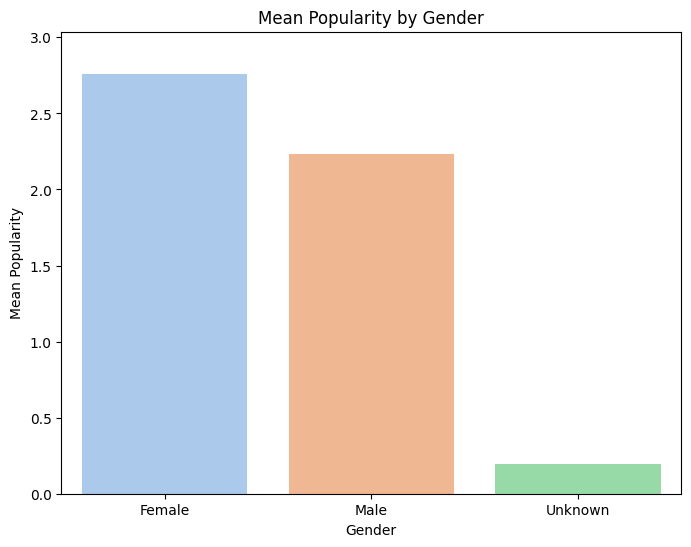

In [7]:
actor_df["actor_popularity"] = pd.to_numeric(actor_df["actor_popularity"], errors='coerce') 
actor_df["gender"] = pd.to_numeric(actor_df["gender"], errors='coerce')

gender_mapping = {1: "Female", 2: "Male"}
actor_df["gender_label"] = actor_df["gender"].map(gender_mapping).fillna("Unknown")

# Calculate mean popularity by gender
mean_popularity = actor_df.groupby("gender_label")["actor_popularity"].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_popularity.index, y=mean_popularity.values, palette="pastel")
plt.title("Mean Popularity by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Popularity")
plt.ylim(0, mean_popularity.max() * 1.1)

GENDER_POPULARITY_PATH_PDF = os.path.join(os.path.abspath(""), "plots", "gender_vs_popularity.pdf")
GENDER_POPULARITY_PATH_PNG = os.path.join(os.path.abspath(""), "plots", "gender_vs_popularity.png")
plt.savefig(GENDER_POPULARITY_PATH_PDF, format = "pdf", bbox_inches="tight")
plt.savefig(GENDER_POPULARITY_PATH_PNG, format = "png", bbox_inches="tight")

plt.show()

# Creating a Lexical Dispersion Plot

Note: Doing the graph of all the wikipages shows an inconsistense 

In [8]:
file_path = WIKI_SCRAPED_PAGES_PATH

with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    page_content = [row['page_content'] for row in reader if 'page_content' in row and row['page_content']]

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

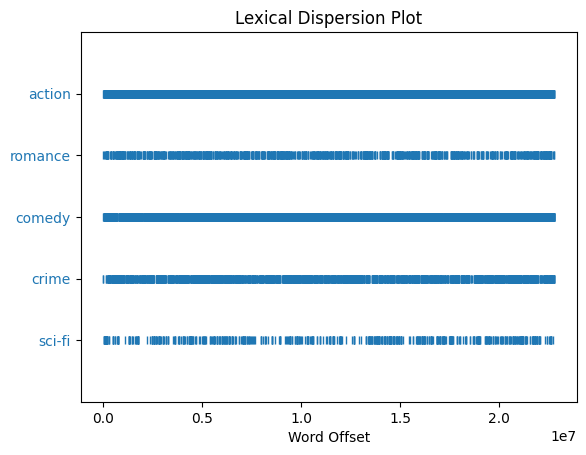

In [9]:
# Combine all page contents into one string
combined_text = " ".join(page_content)

# Tokenize the combined text
tokens = word_tokenize(combined_text.lower())
nltk_text = Text(tokens)

# Words to plot
target_words = ["action", "romance", "comedy", "crime", "sci-fi"]

missing_words = [word for word in target_words if word not in tokens]
if missing_words:
    print(f"The following words are missing and won't appear in the plot: {missing_words}")

# Generate Lexical Dispersion Plot
dispersion_plot(nltk_text, target_words)


**Sentiment Analysis**

*Pie chart showcasing the sentiment distribution*

In [10]:
# Load the CSV data
file_path = WIKI_SCRAPED_PAGES_PATH

with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    page_contents = [row['page_content'] for row in reader if 'page_content' in row and row['page_content']]

In [11]:
# Perform sentiment analysis
sentiment_results = []
for content in page_contents:
    blob = TextBlob(content)
    polarity = blob.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)
    sentiment_results.append(polarity)

# Categorize sentiments
positive = sum(1 for s in sentiment_results if s > 0)
negative = sum(1 for s in sentiment_results if s < 0)
neutral = sum(1 for s in sentiment_results if s == 0)

Positive Sentiments: 8240
Negative Sentiments: 1156
Neutral Sentiments: 42


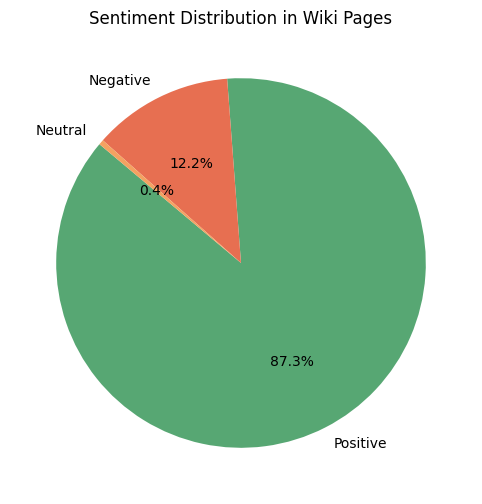

In [12]:
# Display results
print(f"Positive Sentiments: {positive}")
print(f"Negative Sentiments: {negative}")
print(f"Neutral Sentiments: {neutral}")

# Plot the results
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
colors = ['#57a773', '#e76f51', '#f4a261']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Sentiment Distribution in Wiki Pages")

SENTIMENT_DISTRIBUTION_PATH_PDF = os.path.join(os.path.abspath(""), "plots", "sentiment_distribution_wikipedia.pdf")
SENTIMENT_DISTRIBUTION_PATH_PNG = os.path.join(os.path.abspath(""), "plots", "sentiment_distribution_wikipedia.png")
plt.savefig(SENTIMENT_DISTRIBUTION_PATH_PDF, format = "pdf", bbox_inches="tight")
plt.savefig(SENTIMENT_DISTRIBUTION_PATH_PNG, format = "png", bbox_inches="tight")

plt.show()

*Histogram showcasing the sentiment analysis*

In [13]:
# Perform sentiment analysis
sentiment_sequence = []
for content in page_contents:
    blob = TextBlob(content)
    polarity = blob.sentiment.polarity  # Ranges from -1 (negative) to 1 (positive)
    sentiment_sequence.append(polarity)

# Sort sentiment values for histogram and statistical calculations
sentiment_sequence = sorted(sentiment_sequence, reverse=True)

In [14]:
# Calculate statistics
mean_s = np.mean(sentiment_sequence)
median_s = np.median(sentiment_sequence)
percentile_25_s = np.percentile(sentiment_sequence, 25)
percentile_75_s = np.percentile(sentiment_sequence, 75)
percentile_05_s = np.percentile(sentiment_sequence, 5)
percentile_95_s = np.percentile(sentiment_sequence, 95)

# Create bins for the histogram
bin_size = 30
bin_edges = np.linspace(
    min(sentiment_sequence),
    max(sentiment_sequence),
    bin_size + 1
)

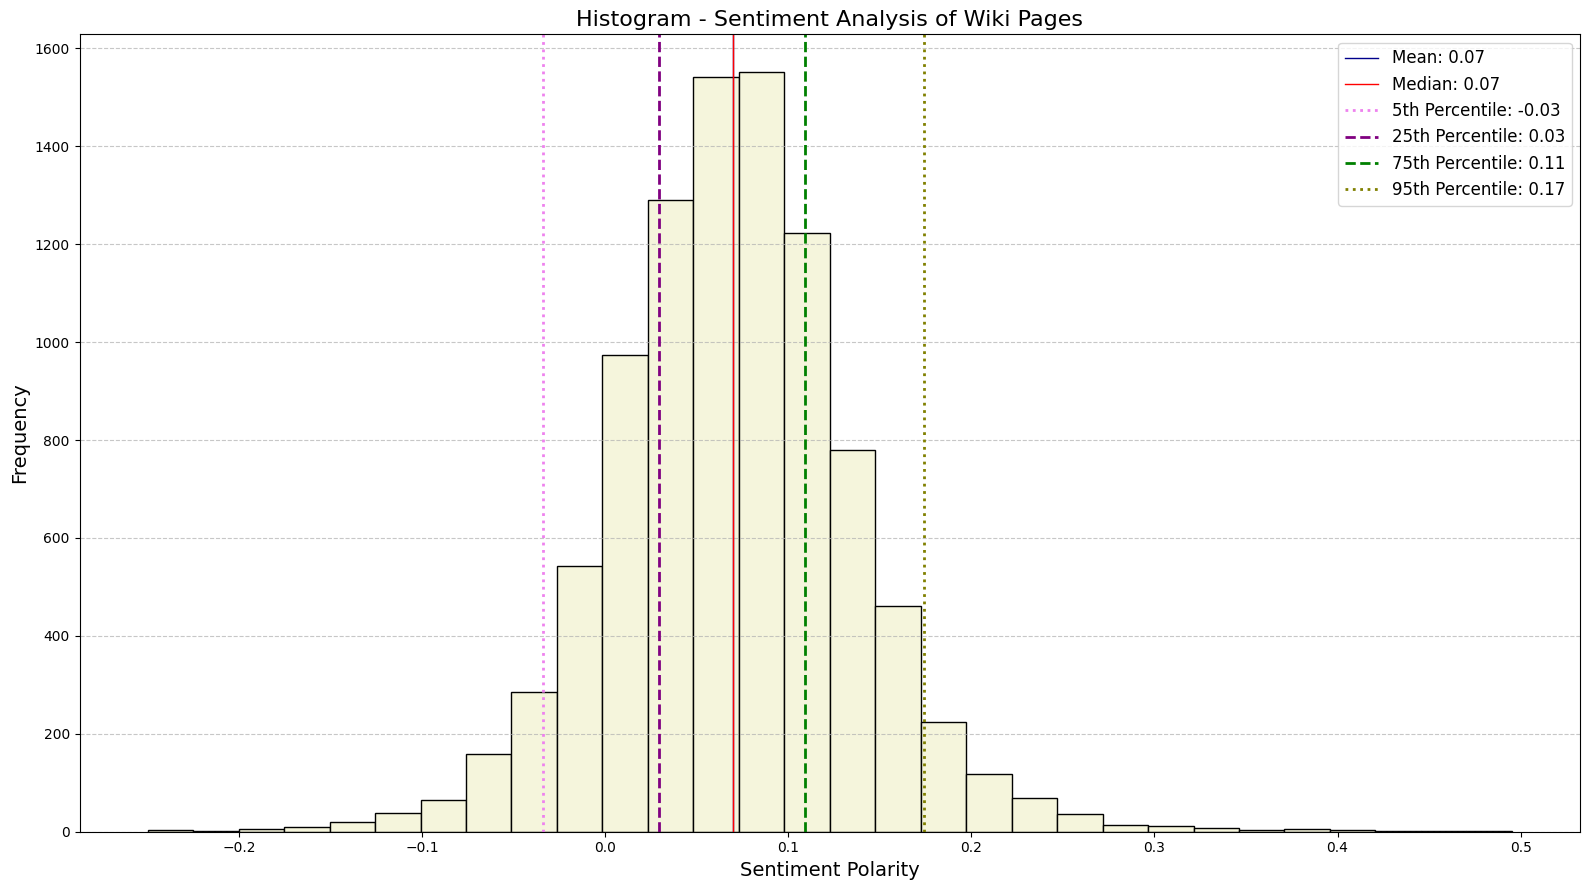

In [15]:
# Create histogram
plt.figure(figsize=(16, 9))

plt.hist(sentiment_sequence, bins=bin_edges, color="beige", edgecolor="black")
plt.title("Histogram - Sentiment Analysis of Wiki Pages", fontsize=16)

# Add vertical lines for statistical markers
plt.axvline(mean_s, color="darkblue", linestyle="-", linewidth=1, label=f'Mean: {mean_s:.2f}')
plt.axvline(median_s, color="red", linestyle="-", linewidth=1, label=f'Median: {median_s:.2f}')
plt.axvline(percentile_05_s, color="violet", linestyle=":", linewidth=2, label=f'5th Percentile: {percentile_05_s:.2f}')
plt.axvline(percentile_25_s, color="purple", linestyle="--", linewidth=2, label=f'25th Percentile: {percentile_25_s:.2f}')
plt.axvline(percentile_75_s, color="green", linestyle="--", linewidth=2, label=f'75th Percentile: {percentile_75_s:.2f}')
plt.axvline(percentile_95_s, color="olive", linestyle=":", linewidth=2, label=f'95th Percentile: {percentile_95_s:.2f}')

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.xlabel("Sentiment Polarity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

SENTIMENT_ANALYSIS_PATH_PDF = os.path.join(os.path.abspath(""), "plots", "sentiment_analysis_wikipedia.pdf")
SENTIMENT_ANALYSIS_PATH_PNG = os.path.join(os.path.abspath(""), "plots", "sentiment_analysis_wikipedia.png")
plt.savefig(SENTIMENT_ANALYSIS_PATH_PDF, format = "pdf", bbox_inches="tight")
plt.savefig(SENTIMENT_ANALYSIS_PATH_PNG, format = "png", bbox_inches="tight")

plt.show()


**Graph of genres and their ratings**

*Violin plot of movie porpularity*

In [16]:
# Load the data
genres_path = TMDB_SCRAPED_GENRES_PATH
features_path = TMDB_SCRAPED_FEATURES_PATH

genres_df = pd.read_csv(genres_path)
features_df = pd.read_csv(features_path)
genre_mapping = dict(zip(genres_df['id'], genres_df['name']))

# Explode the genre_ids column (convert string of lists to individual rows)
features_df['genre_ids'] = features_df['genre_ids'].apply(lambda x: eval(x) if isinstance(x, str) else [])
exploded_df = features_df.explode('genre_ids')
exploded_df['genre_name'] = exploded_df['genre_ids'].map(genre_mapping)
exploded_df = exploded_df.dropna(subset=['genre_name', 'vote_average'])


In [17]:
# Calculate the median vote_average for each genre and sort them
median_order = (
    exploded_df.groupby('genre_name')['vote_average']
    .median()
    .sort_values(ascending=False)
    .index
)

exploded_df['genre_name'] = pd.Categorical(
    exploded_df['genre_name'], categories=median_order, ordered=True
)

/tmp/ipykernel_48170/2261135035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=exploded_df, x='genre_name', y='vote_average', palette='Set2', inner=None)
/tmp/ipykernel_48170/2261135035.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = exploded_df.groupby('genre_name')['vote_average']


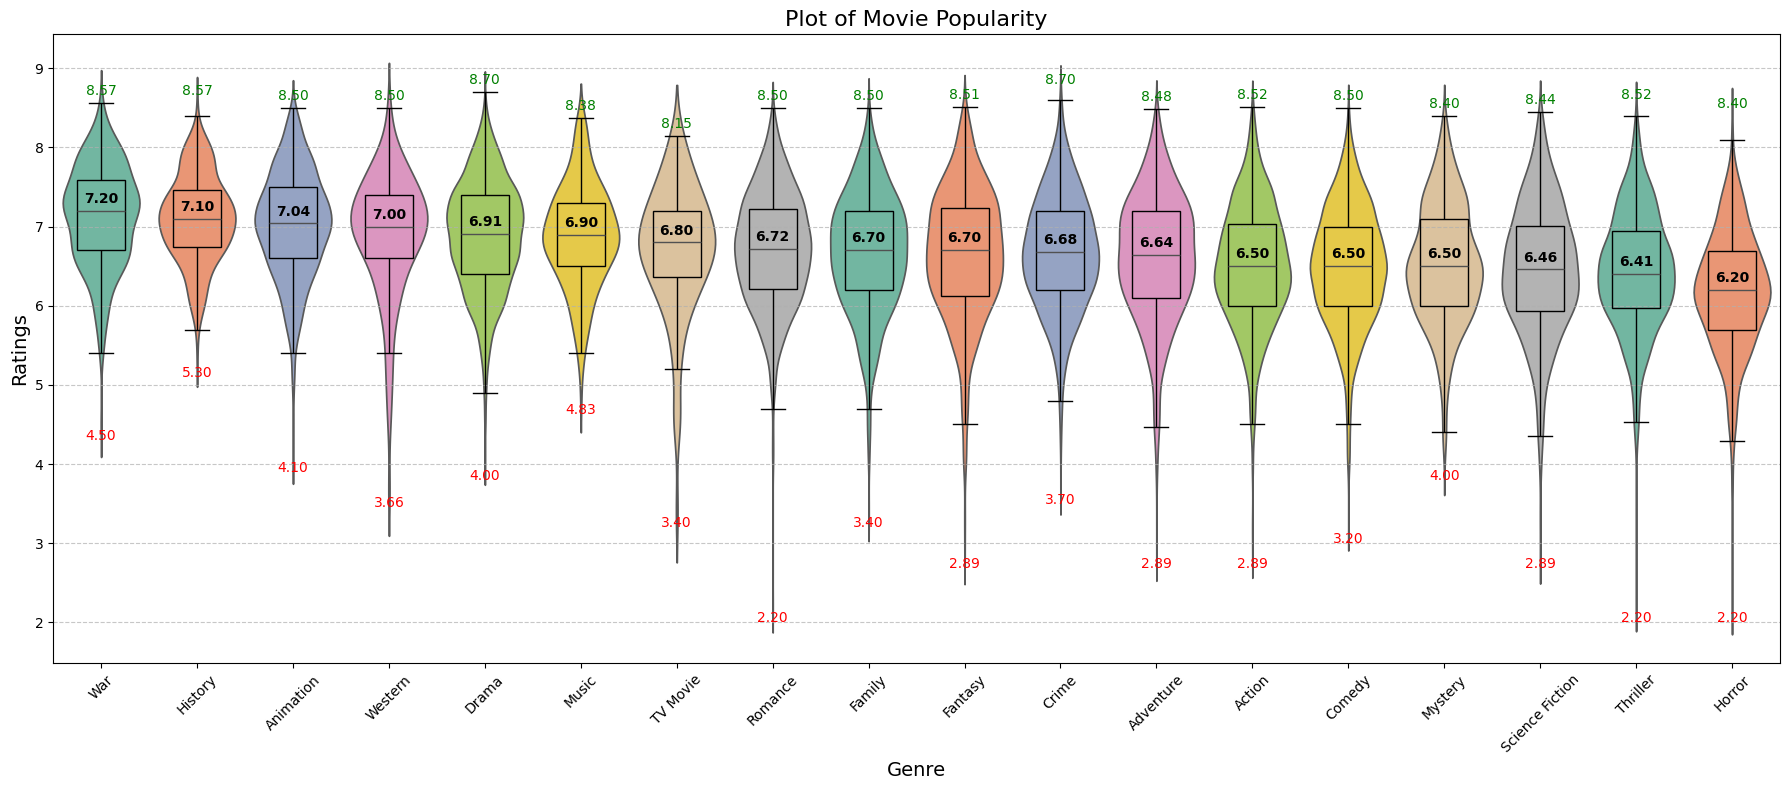

In [18]:
# Create the violin plot for popularity by genre
plt.figure(figsize=(18, 8))
sns.violinplot(data=exploded_df, x='genre_name', y='vote_average', palette='Set2', inner=None)

# Overlay boxplot for medians and quartiles
sns.boxplot(
    data=exploded_df,
    x='genre_name',
    y='vote_average',
    width=0.5,
    showmeans=False,
    showfliers=False,
    meanline=False,
    boxprops={'facecolor': 'none', 'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    capprops={'color': 'black'}
)

# Annotate medians, maxima, and minima
grouped_stats = exploded_df.groupby('genre_name')['vote_average']
medians = grouped_stats.median()
maxima = grouped_stats.max()
minima = grouped_stats.min()

for i, genre in enumerate(medians.index):
    # Median
    plt.text(
        x=i, 
        y=medians[genre] + 0.1, 
        s=f"{medians[genre]:.2f}", 
        color='black', 
        ha='center', 
        fontsize=10, 
        fontweight='bold'
    )
    # Maximum
    plt.text(
        x=i, 
        y=maxima[genre] + 0.1, 
        s=f"{maxima[genre]:.2f}", 
        color='green', 
        ha='center', 
        fontsize=10
    )
    # Minimum
    plt.text(
        x=i, 
        y=minima[genre] - 0.2, 
        s=f"{minima[genre]:.2f}", 
        color='red', 
        ha='center', 
        fontsize=10
    )

# Enhance the plot
plt.title('Plot of Movie Popularity', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and show the plot
plt.tight_layout()

VIOLIN_PLOT_PATH_PDF = os.path.join(os.path.abspath(""), "plots", "Genres_vs_ratings.pdf")
VIOLIN_PLOT_PATH_PNG = os.path.join(os.path.abspath(""), "plots", "Genres_vs_ratings.png")
plt.savefig(VIOLIN_PLOT_PATH_PDF, format = "pdf", bbox_inches="tight")
plt.savefig(VIOLIN_PLOT_PATH_PNG, format = "png", bbox_inches="tight")

plt.show()